In [12]:
from sklearn.datasets import load_breast_cancer

bc=load_breast_cancer()

In [ ]:
print(bc.DESCR)

# DataSet Info

In [ ]:
bc.target.shape


(569,)

In [ ]:
bc.target[0]

np.int64(0)

In [ ]:
bc.data[0]

In [ ]:
bc.data.shape

(569, 30)

# preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=.2)

x_train, x_test, y_train, y_test

In [ ]:
print(f"features=>train:{x_train.shape} - test:{x_test.shape}")
print(f"label=>train:{y_train.shape}-test{y_test.shape}")

features=>train:(455, 30) - test:(114, 30)
label=>train:(455,)-test(114,)


In [ ]:
x_train[0]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

# Performance Metric

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
    
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")

    return acc_train  , acc_test, p, r
   

# Classification

Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb


acc train: 0.9340659340659341 - acc test: 0.956140350877193 - precision: 0.9705882352941176 - recall: 0.9565217391304348


(0.9340659340659341,
 0.956140350877193,
 np.float64(0.9705882352941176),
 np.float64(0.9565217391304348))

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# acc_train_knn, acc_test_knn, p_knn, r_knn


acc train: 0.9736263736263736 - acc test: 0.9736842105263158 - precision: 0.9714285714285714 - recall: 0.9855072463768116


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=128, min_samples_leaf=4, criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=128, min_samples_leaf=4)

In [ ]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# acc_train_dt, acc_test_dt, p_dt, r_dt


acc train: 0.9824175824175824 - acc test: 0.956140350877193 - precision: 0.9571428571428572 - recall: 0.9710144927536232


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=800, max_depth=64, min_samples_split=8  )
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=800)

In [ ]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# acc_train_knn, acc_test_knn, p_knn, r_knn


acc train: 0.9934065934065934 - acc test: 0.956140350877193 - precision: 0.9705882352941176 - recall: 0.9565217391304348


SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# acc_train_svm, acc_test_svm, p_svm, r_svm


acc train: 0.9846153846153847 - acc test: 0.9824561403508771 - precision: 0.971830985915493 - recall: 1.0


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)



LogisticRegression()

In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# acc_train_lr, acc_test_lr, p_lr, r_lr


acc train: 0.9692307692307692 - acc test: 0.9736842105263158 - precision: 0.9583333333333334 - recall: 1.0


ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=1024, activation='relu', solver='adam', batch_size=64 )
ann.fit(x_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=1024)

In [ ]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# acc_train_ann, acc_test_ann, p_ann, r_ann


acc train: 0.9846153846153847 - acc test: 0.9912280701754386 - precision: 0.9857142857142858 - recall: 1.0


# Comparison

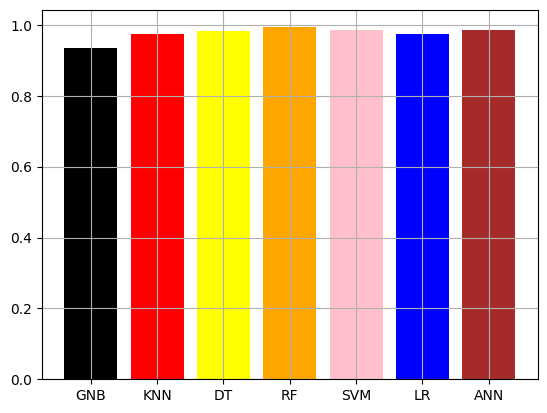

In [ ]:
import matplotlib.pyplot as plt

acc_train =[acc_train_gnb, acc_train_knn, acc_train_dt,acc_train_rf, acc_train_svm, acc_test_lr, acc_train_ann]
title=["GNB", "KNN", "DT", "RF", "SVM", "LR","ANN"]
colors=['black', 'red', 'yellow', 'orange', 'pink', 'blue', 'brown']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()


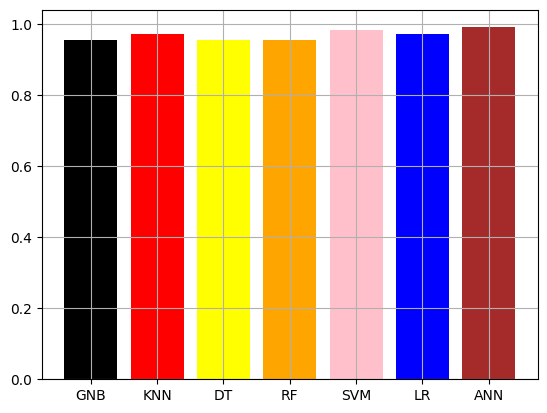

In [ ]:
acc_test =[acc_test_gnb, acc_test_knn, acc_test_dt,acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title=["GNB", "KNN", "DT", "RF", "SVM", "LR","ANN"]
colors=['black', 'red', 'yellow', 'orange', 'pink', 'blue', 'brown']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()


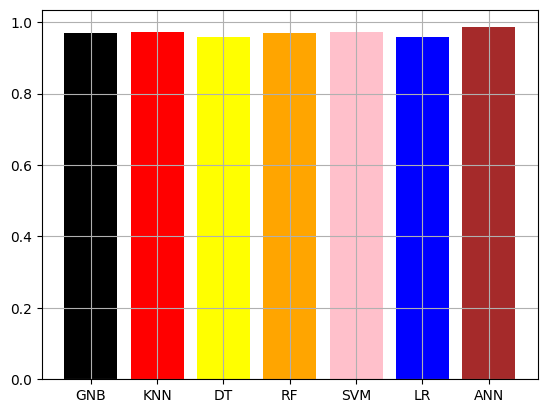

In [ ]:
p =[p_gnb, p_knn, p_dt,p_rf, p_svm, p_lr, p_ann]
title=["GNB", "KNN", "DT", "RF", "SVM", "LR","ANN"]
colors=['black', 'red', 'yellow', 'orange', 'pink', 'blue', 'brown']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()


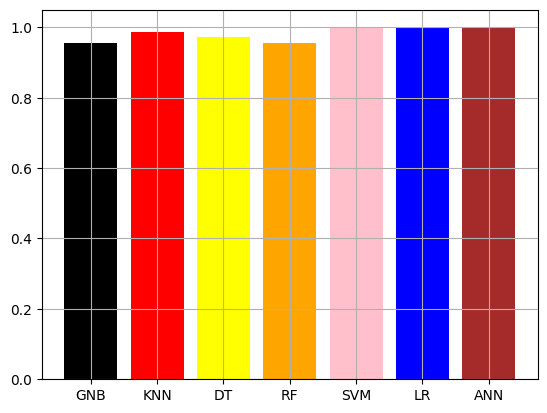

In [ ]:
r =[r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title=["GNB", "KNN", "DT", "RF", "SVM", "LR","ANN"]
colors=['black', 'red', 'yellow', 'orange', 'pink', 'blue', 'brown']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()